## 時系列Data を読み込んでみよう

In [18]:
# File一覧の取得
from glob import glob  # glob を import

files = glob('data/person_count_1sec/out_0001/*.csv')  # Data一覧を取得
files.sort()  # Data一覧を Sort
files[:5]  # 先頭５行を確認

['data/person_count_1sec/out_0001\\person_count_out_0001_2021011509.csv',
 'data/person_count_1sec/out_0001\\person_count_out_0001_2021011510.csv',
 'data/person_count_1sec/out_0001\\person_count_out_0001_2021011511.csv',
 'data/person_count_1sec/out_0001\\person_count_out_0001_2021011512.csv',
 'data/person_count_1sec/out_0001\\person_count_out_0001_2021011513.csv']

File名が「person_count_out_0001」までが共通で、その後ろは、「2021011509」となっており、2021年１月15日の９時代の Data であると考えられる。
まずは、最初の File だけを読み込んでみる

In [2]:
# 先頭Data の読み込み
import pandas as pd
from IPython.display import display

data = pd.read_csv(files[0])  # 先頭の File のみ読み込み
display(data.head(5))  # Data の先頭５行のみ表示
print(data.dtypes)  # 各列の Data型を表示

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0


id               int64
place            int64
receive_time    object
sensor_num       int64
in1              int64
out1             int64
state1           int64
in2              int64
out2             int64
state2           int64
dtype: object


receive_time に milli秒単位まで入っている。
※ IoT等の sensor data では milli秒単位まで出てくることが多い。
Data型が object型になっており、このままでは文字列情報としてか使用できないので datetime型に変換していく。

In [3]:
# datetime型への変換
data['receive_time'] = pd.to_datetime(data['receive_time'])
display(data.head())
print(data.dtypes)

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0


id                       int64
place                    int64
receive_time    datetime64[ns]
sensor_num               int64
in1                      int64
out1                     int64
state1                   int64
in2                      int64
out2                     int64
state2                   int64
dtype: object


datetime型は読み込み時にも指定できる。あらかしめ Data を確認し、datetime型で読み込みたい Column が決まっている場合は、読み込み時に指定するのが良い。

In [4]:
# datetime型を指定して読み込み
data = pd.read_csv(files[0], parse_dates=['receive_time'])  # datetime型で読み込む列を指定して読み込み
display(data.head())  # 先頭５行を表示
print(data.dtypes)  # 各列の Data型を確認

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0


id                       int64
place                    int64
receive_time    datetime64[ns]
sensor_num               int64
in1                      int64
out1                     int64
state1                   int64
in2                      int64
out2                     int64
state2                   int64
dtype: object


読み込み時に、receive_time列にdatetime型を指定して全File を読み込んでいく

In [5]:
# 全Data の読み込み
data = []  # List を準備
for f in files:
    tmp = pd.read_csv(f, parse_dates=['receive_time'])  # receive_time を datetime型で指定して読み込み
    data.append(tmp)  # List に Data を追加
data = pd.concat(data, ignore_index=True)  # Data を結合。ignore_index=True で index は結合毎にふりなおす
display(data.head())  # 先頭５行を表示
len(data)  # Data件数を表示

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0


2346162

## 日付の範囲を確認しよう

いつからいつの Data なのか開始日と終了日を取得して出力してみる。
分析対象がどの日付の範囲で、何日間の Data なのかを把握する必要がある

In [6]:
# 開始日、終了日の表示
min_receive_time = data['receive_time'].min()  # receive_time列の最小値を取得
max_receive_time = data['receive_time'].max()  # receive_time列の最大値を取得
print(min_receive_time)  # 最小値を表示
print(max_receive_time)  # 最大値を表示

2021-01-15 09:00:00.144000
2021-02-14 17:59:59.956000


In [7]:
# 期間の表示
print(data['receive_time'].max() - data['receive_time'].min())

30 days 08:59:59.812000


## 日毎の Data件数を確認しよう

日毎の Data件数を各員していく。
Sensor data のような場合
- 仕様的には１秒ごとに Data を取得している場合でも、ブレが生じることが多々ある。
- Sensor の故障等で、Data が欠損している場合がある。

上記の観点から、日単位程度でしっかりと把握しておく

In [8]:
# 日単位への変換
data['receive_date'] = data['receive_time'].dt.date  # Milli秒数単位の receive_time を日単位の Data に変換する
data.head()  # 先頭５行を表示

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0,2021-01-15
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0,2021-01-15
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0,2021-01-15
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0,2021-01-15
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0,2021-01-15


In [9]:
# 日別Data の集計
daily_count = data[['receive_date', 'id']].groupby('receive_date',
                                                   as_index=False).count()  # receive_date と id に絞り込み receive_date毎で集計
daily_count.head()  # 先頭５行を表示

,receive_date,id
0,2021-01-15,50166
1,2021-01-16,75699
2,2021-01-17,73198
3,2021-01-18,78365
4,2021-01-19,78348


2021年１月15日は、Data件数が少ない。おそらく開始時間が９時からであるのが影響していると思われる。
30日分を数字で見ていくのは厳しいため、棒Graph で可視化してみる

<AxesSubplot:xlabel='receive_date', ylabel='id'>

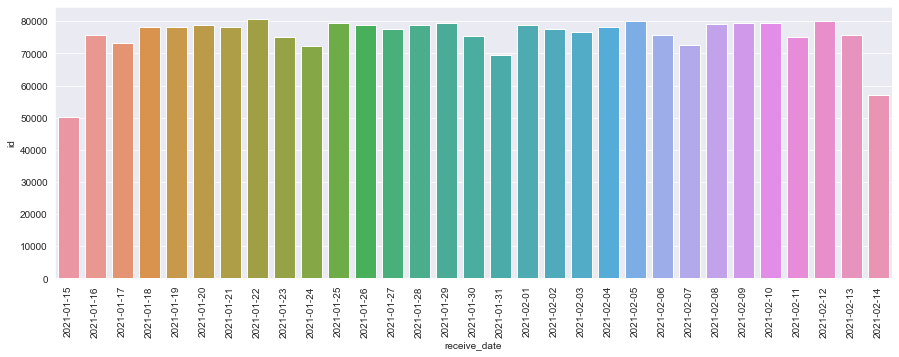

In [10]:
# 日別Data の棒Graph
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))  # Graph size を設定
plt.xticks(rotation=90)  # X軸の Label text を90度回転
sns.barplot(x=daily_count['receive_date'], y=daily_count['id'])  # 棒Graph を描画

基本的には７万件程度だが、１月23日、24日のように時々 Data件数が下がっている。
５日間７万件、２日間は下がるという規則性から曜日が関係しているのではないかと想像できる。曜日を取得してみる

## 日付から曜日を算出してみよう

In [11]:
# 曜日情報の取得
data['dayofweek'] = data['receive_time'].dt.dayofweek
data['day_name'] = data['receive_time'].dt.day_name()
data.head()

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0,2021-01-15,4,Friday
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0,2021-01-15,4,Friday
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0,2021-01-15,4,Friday
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0,2021-01-15,4,Friday
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0,2021-01-15,4,Friday


dt を利用して曜日を取得。
曜日を数字でとるか英語名でとるかは Case by case.
- 数字: Data が軽い。何番がどの曜日か不明。
- 英語名: 曜日が分かる。Data が重い

０番目が月曜日で、１番火曜日と増えていき、６番目が日曜日になる

どの日付が何曜日なのか確認しやすくするために日付単位の Data にしていく。
※ 集計すると英語名が対応できない為、重複削除することで対応する。

In [12]:
# 日単位での曜日表示
data[['receive_date', 'dayofweek', 'day_name']].drop_duplicates(subset='receive_date').head(
    10)  # drop_duplicates()で receive_date毎に unique になるように重複を削除し、Data の先頭10件を表示

,receive_date,dayofweek,day_name
0,2021-01-15,4,Friday
50166,2021-01-16,5,Saturday
125865,2021-01-17,6,Sunday
199063,2021-01-18,0,Monday
277428,2021-01-19,1,Tuesday
355776,2021-01-20,2,Wednesday
434668,2021-01-21,3,Thursday
513010,2021-01-22,4,Friday
593585,2021-01-23,5,Saturday
668686,2021-01-24,6,Sunday


前述の Data件数が下がっていた23日が土曜日、24日が日曜日であることがわかる。
細かい Data は Sensor の仕様等にもよるが、この Data は土日の Data件数が少なくなるということを頭にいれておく。

比較的 Data件数が近い値である１月20、21、22日の Data に絞り込んでいく

## 特定範囲の Dataに絞り込もう

In [13]:
# 日付による　Data の絞り込み
import datetime as dt

data_extract = data.loc[
    (data['receive_time'] >= dt.datetime(2021, 1, 20)) & (
            data['receive_time'] < dt.datetime(2021, 1, 23))].copy()  # 2021年1月20日から22日までの　Data を絞り込み

display(data_extract.head())  # 先頭５行を表示
display(data_extract.tail())  # 末尾５行を表示

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name
355776,0,1,2021-01-20 00:00:40.839,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday
355777,1,1,2021-01-20 00:00:41.854,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday
355778,2,1,2021-01-20 00:00:56.055,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday
355779,3,1,2021-01-20 00:00:57.071,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday
355780,4,1,2021-01-20 00:00:58.086,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday


,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name
593580,2620,1,2021-01-22 23:58:32.865,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday
593581,2621,1,2021-01-22 23:58:33.881,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday
593582,2622,1,2021-01-22 23:58:34.896,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday
593583,2623,1,2021-01-22 23:58:35.912,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday
593584,2624,1,2021-01-22 23:58:36.927,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday


## 秒単位の Data を作成しよう
Milli秒単位の Data を秒単位の Data に変えていく

In [14]:
# round による秒単位 Data の作成
data_extract['receive_time_sec'] = data_extract['receive_time'].dt.round('S')  # round()の中に秒単位で丸めるということで 'S' を指定
data_extract  # 表示する

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name,receive_time_sec
355776,0,1,2021-01-20 00:00:40.839,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:41
355777,1,1,2021-01-20 00:00:41.854,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:42
355778,2,1,2021-01-20 00:00:56.055,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:56
355779,3,1,2021-01-20 00:00:57.071,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:57
355780,4,1,2021-01-20 00:00:58.086,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593580,2620,1,2021-01-22 23:58:32.865,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday,2021-01-22 23:58:33
593581,2621,1,2021-01-22 23:58:33.881,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday,2021-01-22 23:58:34
593582,2622,1,2021-01-22 23:58:34.896,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday,2021-01-22 23:58:35
593583,2623,1,2021-01-22 23:58:35.912,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday,2021-01-22 23:58:36


秒単位に丸めた際に、必ず重複がないか確認するべきである。

In [15]:
## 重複の確認
print(len(data_extract))
print(len(data_extract['receive_time_sec'].unique()))

237809
237807


２件 Data がズレているため、重複Data を確認していく。

In [16]:
# 重複Data の表示
data_extract[data_extract['receive_time_sec'].duplicated(
    keep=False)].head()  # duplicated()で重複しているかの　True | False を取得。keep=False を指定しないと重複Data の片方しか False にならない

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name,receive_time_sec
578874,887,1,2021-01-22 19:15:06.530,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:07
578875,888,1,2021-01-22 19:15:07.409,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:07
578876,889,1,2021-01-22 19:15:07.546,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:08
578877,890,1,2021-01-22 19:15:08.424,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:08


重複Data は、四捨五入していることに起因している様子。
そこで、 floor()で切り捨ても行なってみる。（※ 合わせて重複件数の Check も行なう。）

In [20]:
# floor による秒単位Data の作成
data_extract['receive_time_sec'] = data_extract['receive_time'].dt.floor('S')  # dt.floor() で切り捨てを行なう
display(data_extract.head())  # 先頭５行の表示
print(len(data_extract))  # Data 件数を表示
print(len(data_extract['receive_time_sec'].unique()))  # receive_time_sec の一意性のある Data 件数を表示

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name,receive_time_sec
355776,0,1,2021-01-20 00:00:40.839,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:40
355777,1,1,2021-01-20 00:00:41.854,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:41
355778,2,1,2021-01-20 00:00:56.055,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:56
355779,3,1,2021-01-20 00:00:57.071,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:57
355780,4,1,2021-01-20 00:00:58.086,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:58


237809
237808


重複件数は１件になった。
重複Data を確認していく。

In [21]:
# 重複Data の確認
data_extract[data_extract['receive_time_sec'].duplicated(
    keep=False)].head()  # duplicated()で重複しているかの　True | False を取得。keep=False を指定しないと重複Data の片方しか False にならない

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name,receive_time_sec
578875,888,1,2021-01-22 19:15:07.409,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:07
578876,889,1,2021-01-22 19:15:07.546,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:07


Sensor がおよそ100milli秒後に測定していることに起因して重複している。（※ Sensor data ではこういった Data が頻出する。）

- 秒単位の Sensor data は大量に Data が存在するため、あまり大きな問題にはならない。
- 全体の件数Impact としても240万件弱のうち１件もしくは２件のレベルの重複。

上記の観点から、今回は、このまま floor()　で丸めた Data で重複削除を行ない進んでいくとする。
（※合わせて、開始から終了の日付を取得しておく。）

In [22]:
# 重複Data の削除
data_extract = data_extract.drop_duplicates(subset=['receive_time_sec'])  # receive_time_sec で重複している行を削除
min_receive_time = data_extract['receive_time_sec'].min()  # 最小値(開始の日付)を取得
max_receive_time = data_extract['receive_time_sec'].max()  # 最大値(終了の日付)を取得
print(len(data_extract))  # Data件数を表示
print(f"{min_receive_time}から{max_receive_time}")  #  開始日から終了日を表示

237808
2021-01-20 00:00:40から2021-01-22 23:58:36
